<a href="https://colab.research.google.com/github/JBlake26/ECGR4105_IntroToML/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 4**

In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

In [1]:
#drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

Problem 1

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

In [2]:
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_data.shape

cancerI = pd.DataFrame(cancer_data)
cancerI.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancerL = cancer.target
cancerL.shape

L = np.reshape(cancerL,(569,1))
cancerD = np.concatenate([cancer_data,L],axis=1)
cancerD.shape

(569, 31)

In [4]:
cancerDST = pd.DataFrame(cancerD)
F = cancer.feature_names
F

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
LL = np.append(F,'label')
cancerDST.columns = LL
cancerDST.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
FeatureX = cancerDST.iloc[:,:30].values
FeatureY = cancerDST.iloc[:,30].values
import random 
X_train, X_test, Y_train, Y_test = train_test_split(FeatureX, FeatureY, train_size=0.8, test_size=.2, random_state = 3) 

In [7]:
# Standardize for overfitting

SCX = StandardScaler()
X_train = SCX.fit_transform(X_train)
X_test = SCX.transform(X_test)

Kernel type is chenged here to explore different kernel tricks to capture non-linearities within the data. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’.


In [8]:
# See above comment for different kernel types

classifier = SVC(kernel = 'rbf', class_weight='balanced', C= 1)
classifier.fit(X_train,Y_train)

SVC(C=1, class_weight='balanced')

In [9]:
Y_Pred = classifier.predict(X_test)

# Model metrics

CM = np.array(confusion_matrix(Y_test,Y_Pred,labels=[1,0]))
confusion = pd.DataFrame(CM,index =['Malignant', 'Benign'],columns=['Predicted Malignant','Predicted Benign'])
confusion

,Predicted Malignant,Predicted Benign
Malignant,71,3
Benign,2,38


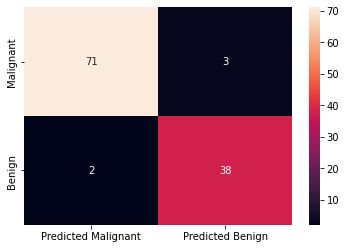

In [10]:
sns.heatmap(confusion,annot=True)

In [11]:
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        40
         1.0       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
# Model evaluation

precision = metrics.precision_score(Y_test, Y_Pred)
recall = metrics.recall_score(Y_test, Y_Pred)
accuracy = metrics.accuracy_score(Y_test, Y_Pred)
average = (accuracy + precision + recall)/3
  
print("Precision:", precision)
print("Recall:",recall)  
print("Accuracy:", accuracy)
print("Average",average)

Precision: 0.9726027397260274
Recall: 0.9594594594594594
Accuracy: 0.956140350877193
Average 0.9627341833542266


In [13]:
# PCA

x = cancerDST.loc[:, F].values
y = cancerDST.loc[:,['label']].values
x = StandardScaler().fit_transform(x)
precisionGraph = []
recallGraph = []
accuracyGraph = []

In [14]:
# K values

for k in range(1, 31):
    pca = PCA(n_components = k)
    PComponents = pca.fit_transform(x)
    Pdf = pd.DataFrame(data = PComponents, columns = [*range(1,k+1)]) 
    final_Df = pd.concat([Pdf, cancerDST[['label']]], axis = 1)
    outcome = final_Df.pop("label")
    x2 = final_Df.values
    y2 = outcome.values
    X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 3) 

    classifier.fit(X_train, Y_train)

    # Prediction
    Y_pred = classifier.predict(X_test)

    # Confusion Matrix
    cnf_matrix = confusion_matrix(Y_test, Y_pred)

    # Variables
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)

    precisionGraph.append(precision)
    recallGraph.append(recall)
    accuracyGraph.append(accuracy)

    # Average
    New_Average = (accuracy + precision + recall)/3
    print(New_Average)
    index = k
    if average < New_Average: 
        average = New_Average
        index = k

0.9341966710387762
0.9328968478211449
0.9257151888730837
0.9476199698586653
0.9551788630735999
0.9551788630735999
0.9551788630735999
0.9551788630735999
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266
0.9627341833542266


In [15]:
# Use confusion matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("Final K value: ", index )

Accuracy: 0.956140350877193
Precision: 0.9726027397260274
Recall: 0.9594594594594594
Final K value:  30


In [16]:
CM = np.array(confusion_matrix(Y_test,Y_Pred,labels=[1,0]))
confusion = pd.DataFrame(CM,index =['Malignant', 'Benign'],columns=['Predicted Malignant','Predicted Benign'])
confusion

,Predicted Malignant,Predicted Benign
Malignant,71,3
Benign,2,38


              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        40
         1.0       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



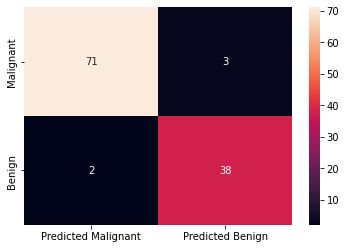

In [17]:
sns.heatmap(confusion,annot=True)
print(classification_report(Y_test,Y_pred))

In [18]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        40
         1.0       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



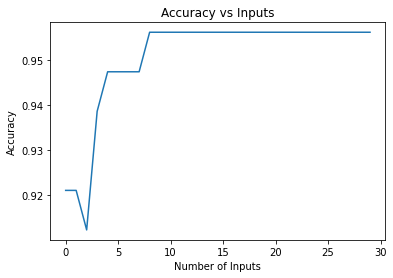

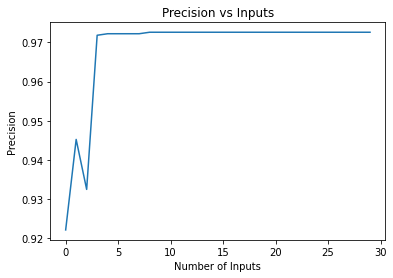

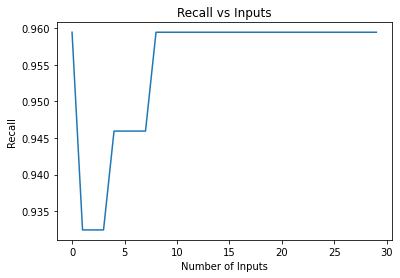

In [19]:
# Graphs
plt.plot(accuracyGraph)
plt.xlabel('Number of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('Number of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('Number of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

In [20]:
pca = PCA(n_components = 12)
Pcomponents = pca.fit_transform(x)
Pdf = pd.DataFrame(data = Pcomponents, columns = [*range(1,12+1)]) 
final_Df = pd.concat([Pdf, cancerDST[['label']]], axis = 1)
print(final_Df)
outcome = final_Df.pop("label")

x2 = final_Df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 3) 
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

# Use confusion matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred) 

# Variables

accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)

             1          2         3         4         5         6         7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668167   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

            8         9        10        11        

In [21]:
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
plt.rcParams["figure.figsize"] = (12,8)

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        40
         1.0       0.97      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  2]
 [ 3 71]]


Problem 2

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [22]:
data_set_file_path ='/content/drive/MyDrive/ECGR 4105 - Intro to Machine Learning/Homework/Housing.csv'
csv = pd.read_csv(data_set_file_path)
csv.shape

(545, 13)

In [23]:
df = pd.DataFrame(csv)
df.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [24]:
def useful_category(df):
    temp_df = df
    columns = df.columns.tolist()
    types = df.dtypes
    for i in range(len(columns)):

        if types[i] == 'object' or types[i] == 'str':
            temp_df[columns[i]] = df[columns[i]].astype('category').cat.codes
        else: 
            temp_df[columns[i]] = df[columns[i]]
    return temp_df
    
df = useful_category(df)
print(df.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [25]:
# Inputs Outputs
col1 = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
In = df[col1]
Out = df.loc[:, df.columns == 'price']

X_train, X_test, Y_train, Y_test = train_test_split(In, Out, train_size=0.8, test_size=.2, random_state = 3) 

# Standardize
SCX = StandardScaler()
X_train = SCX.fit_transform(X_train)
X_test = SCX.transform(X_test)
SCY = StandardScaler()
Y_train = SCY.fit_transform(Y_train)
Y_test = SCY.fit_transform(Y_test)

Kernel type for rbf, poly, and linear.

In [26]:
#svr_rbf = SVR(kernel='rbf', C=1e3)
#svr_poly = SVR(kernel='poly', C=10.0)
svr_lin = SVR(kernel='linear', C=10.0)
#YRBF = svr_rbf.fit(X_train, Y_train).predict(X_test)
#YPOLY = svr_poly.fit(X_train, Y_train).predict(X_test)
YLIN = svr_lin.fit(X_train, Y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# print(YRBF[:10])
# print(Y_test[:10])
# print('Test R^2: %.3f'%r2_score(Y_test, YRBF))
# print('Test R^2: %.3f'%svr_rbf.score(X_test, Y_test))
# print('Training R^2: %.3f'%svr_rbf.score(X_train, Y_train))
# R2 = svr_rbf.score(X_train,Y_train)
# print('Test MSE  : %.3f'%mean_squared_error(Y_test, YRBF))
# print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_rbf.predict(X_train)))

# print(YPOLY[:10])
# print(Y_test[:10])
# print('Test R^2: %.3f'%r2_score(Y_test, YPOLY))
# print('Test R^2: %.3f'%svr_poly.score(X_test, Y_test))
# print('Training R^2: %.3f'%svr_poly.score(X_train, Y_train))
# R2 = svr_poly.score(X_train,Y_train)
# print('Test MSE  : %.3f'%mean_squared_error(Y_test, YPOLY))
# print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_poly.predict(X_train)))

print(YLIN[:10])
print(Y_test[:10])
print('Test R^2: %.3f'%r2_score(Y_test, YLIN))
print('Test R^2: %.3f'%svr_lin.score(X_test, Y_test))
print('Training R^2: %.3f'%svr_lin.score(X_train, Y_train))
R2 = svr_lin.score(X_train,Y_train)
print('Test MSE  : %.3f'%mean_squared_error(Y_test, YLIN))
print('Train MSE : %.3f'%mean_squared_error(Y_train, svr_lin.predict(X_train)))

[-0.0779025  -0.54632203  0.53020581  0.55620947 -0.27926364 -0.24090037
 -0.1053668   1.59004636 -0.57094602 -0.11267681]
[[-0.3442918 ]
 [ 0.15745911]
 [ 0.81521661]
 [ 0.4568231 ]
 [-1.16648866]
 [-0.30212785]
 [-0.3442918 ]
 [ 1.46875771]
 [-0.72376727]
 [ 0.07734762]]
Test R^2: 0.608
Test R^2: 0.608
Training R^2: 0.671
Test MSE  : 0.392
Train MSE : 0.329


In [28]:
# Seperate
In  = df[col1]
Out = df.loc[:, df.columns == 'price'] 
In  = StandardScaler().fit_transform(In) 
Out = StandardScaler().fit_transform(Out)
Out = Out.flatten()
Out_Series = pd.Series(Out)

#classifier = SVR(kernel = 'rbf', C= 10)
#classifier = SVR(kernel = 'poly', C= 10)
classifier = SVR(kernel = 'linear', C= 10)

r2GraphTrain = []
r2GraphPred = []
r2GraphTest = []

In [29]:
# K values
for k in range(1, 12):
    pca = PCA(n_components = k)
    components = pca.fit_transform(In)
    principal_Df = pd.DataFrame(data = components, columns = [*range(1,k+1)]) 
    final_df = pd.concat([principal_Df, Out_Series], axis = 1)
    
    outcome = final_df.pop(1)
    
    x2 = final_df.values
    y2 = outcome.values
    X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 5) 
 
    
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)

    
    # Variables

    New_R2= classifier.score(X_train, Y_train)
    print(New_R2)
    R2_Pred = r2_score(Y_test, Y_pred)
    R2_Test = classifier.score(X_test, Y_test)

    r2GraphTest.append(R2_Test)
    r2GraphTrain.append(New_R2)
    r2GraphPred.append(R2_Pred)
    
    # Average

    if  R2 < New_R2: 
        R2 = New_R2
        index = k

0.6289578313784876
0.628180608229099
0.6300216286011213
0.6326044862300242
0.6325795214955834
0.6322966708821455
0.6391145798899157
0.6385656169412103
0.6440483852223164
0.6444143601130055
0.6462658456377166


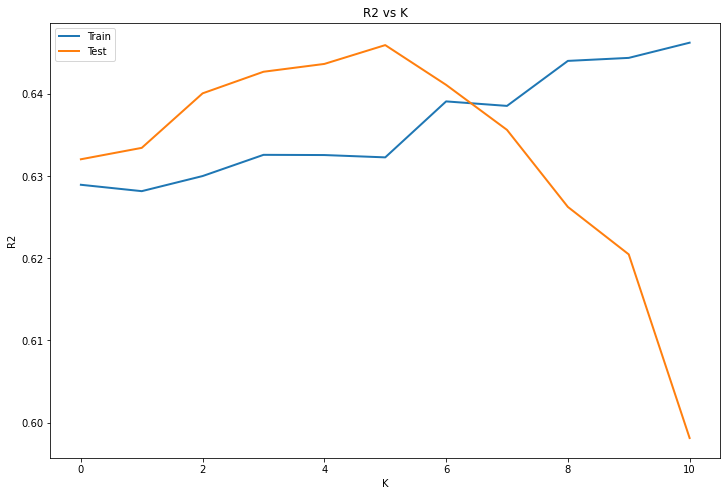

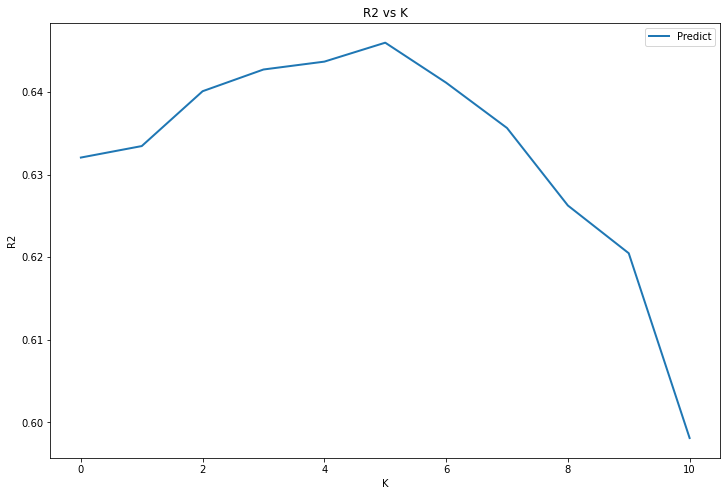

In [30]:
# Graph Accuracy
lw = 2
plt.plot(r2GraphTrain, lw = lw, label = "Train")
plt.plot(r2GraphTest, lw = lw, label = "Test")
plt.xlabel('K')
plt.ylabel('R2')
plt.title('R2 vs K')
plt.legend()
plt.show()
plt.plot(r2GraphPred, lw=lw, label = "Predict")
plt.xlabel('K')
plt.ylabel('R2')
plt.title('R2 vs K')
plt.legend()